# Recommendation System: Assignment No.10

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 300

1.Book Dataset

In [2]:
df = pd.read_csv('recommend1.csv',encoding='latin1',index_col=0)
df

,User.ID,Book.Title,Book.Rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6
...,...,...,...
9996,162121,American Fried: Adventures of a Happy Eater.,7
9997,162121,Cannibal In Manhattan,9
9998,162121,How to Flirt: A Practical Guide,7
9999,162121,Twilight,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User.ID      10000 non-null  int64 
 1   Book.Title   10000 non-null  object
 2   Book.Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 312.5+ KB


In [4]:
df.describe()

,User.ID,Book.Rating
count,10000.000000,10000.00000
mean,95321.249800,7.56630
std,117645.703609,1.82152
min,8.000000,1.00000
25%,2103.000000,7.00000
50%,3757.000000,8.00000
75%,162052.000000,9.00000
max,278854.000000,10.00000


In [5]:
df.describe(include=object)

,Book.Title
count,10000
unique,9659
top,Fahrenheit 451
freq,5


In [6]:
df.rename(columns={'User.ID':'Userid','Book.Title':'Book_Title','Book.Rating':'Book_Rating'},inplace=True)

In [7]:
df.head(5)

,Userid,Book_Title,Book_Rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6


In [8]:
df['Userid'].nunique()

2182

In [9]:
df['Book_Title'].nunique()

9659

In [10]:
#Data Visualisation
sns.set_theme(style='darkgrid',palette='viridis')

In [11]:
df['Book_Title'].value_counts()

Fahrenheit 451                                              5
Charlie and the Chocolate Factory                           4
The Subtle Knife (His Dark Materials, Book 2)               4
Vanished                                                    4
Ender's Game (Ender Wiggins Saga (Paperback))               4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: Book_Title, Length: 9659, dtype: int64

<Axes: ylabel='Book_Rating'>

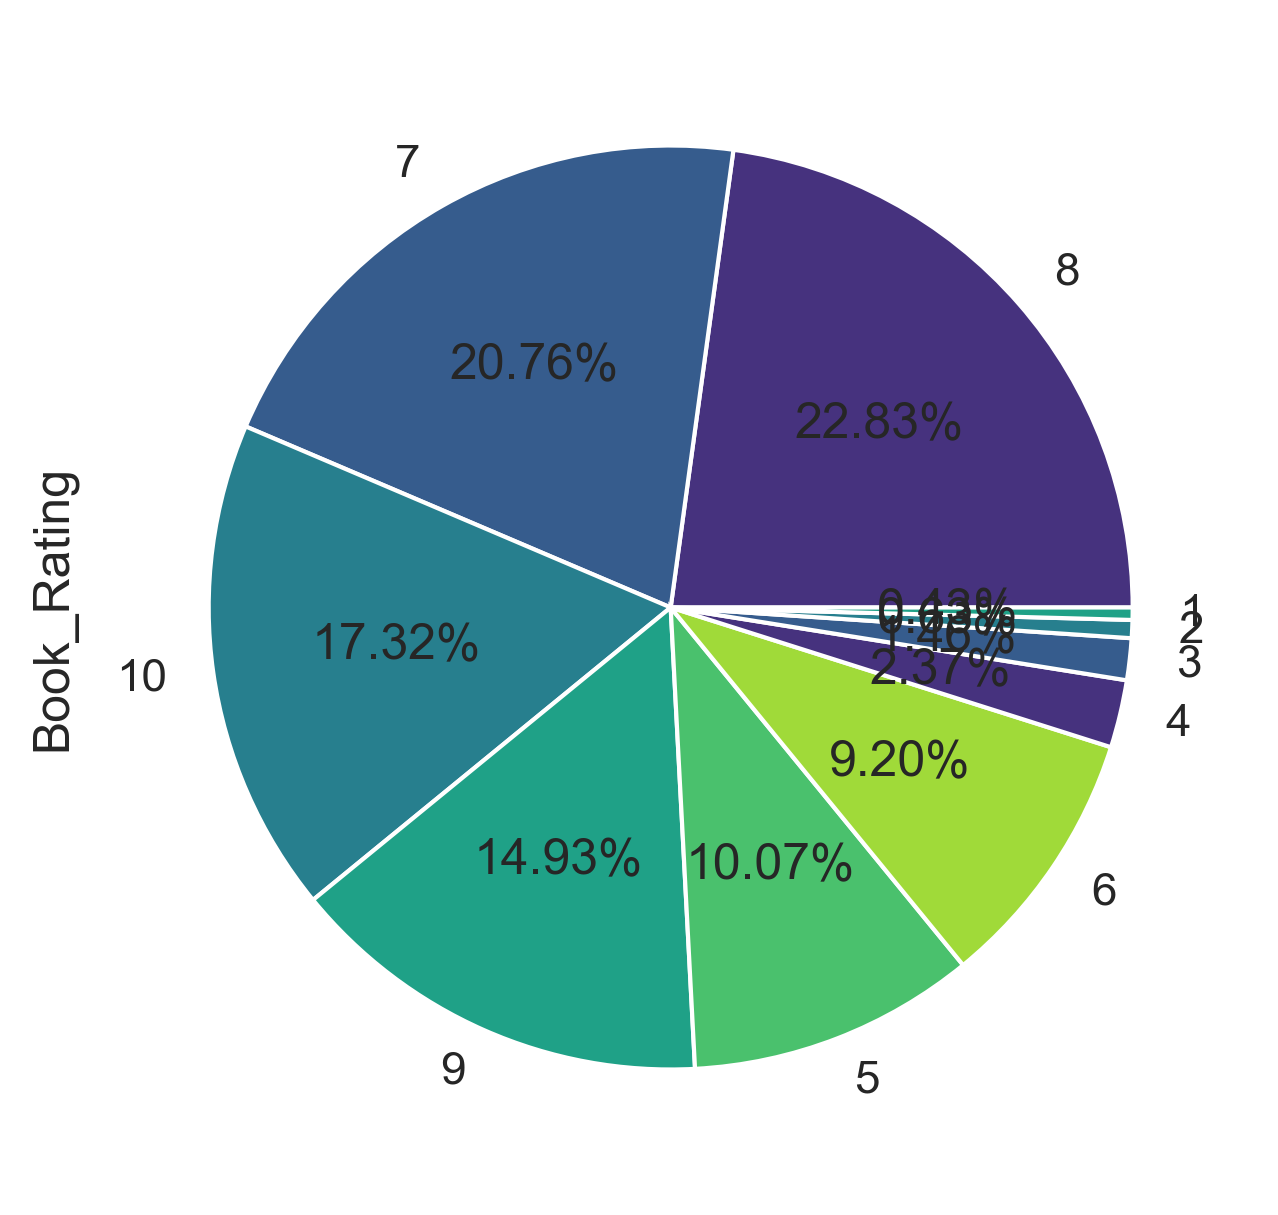

In [12]:
df['Book_Rating'].value_counts().plot(kind='pie',autopct='%0.2f%%')

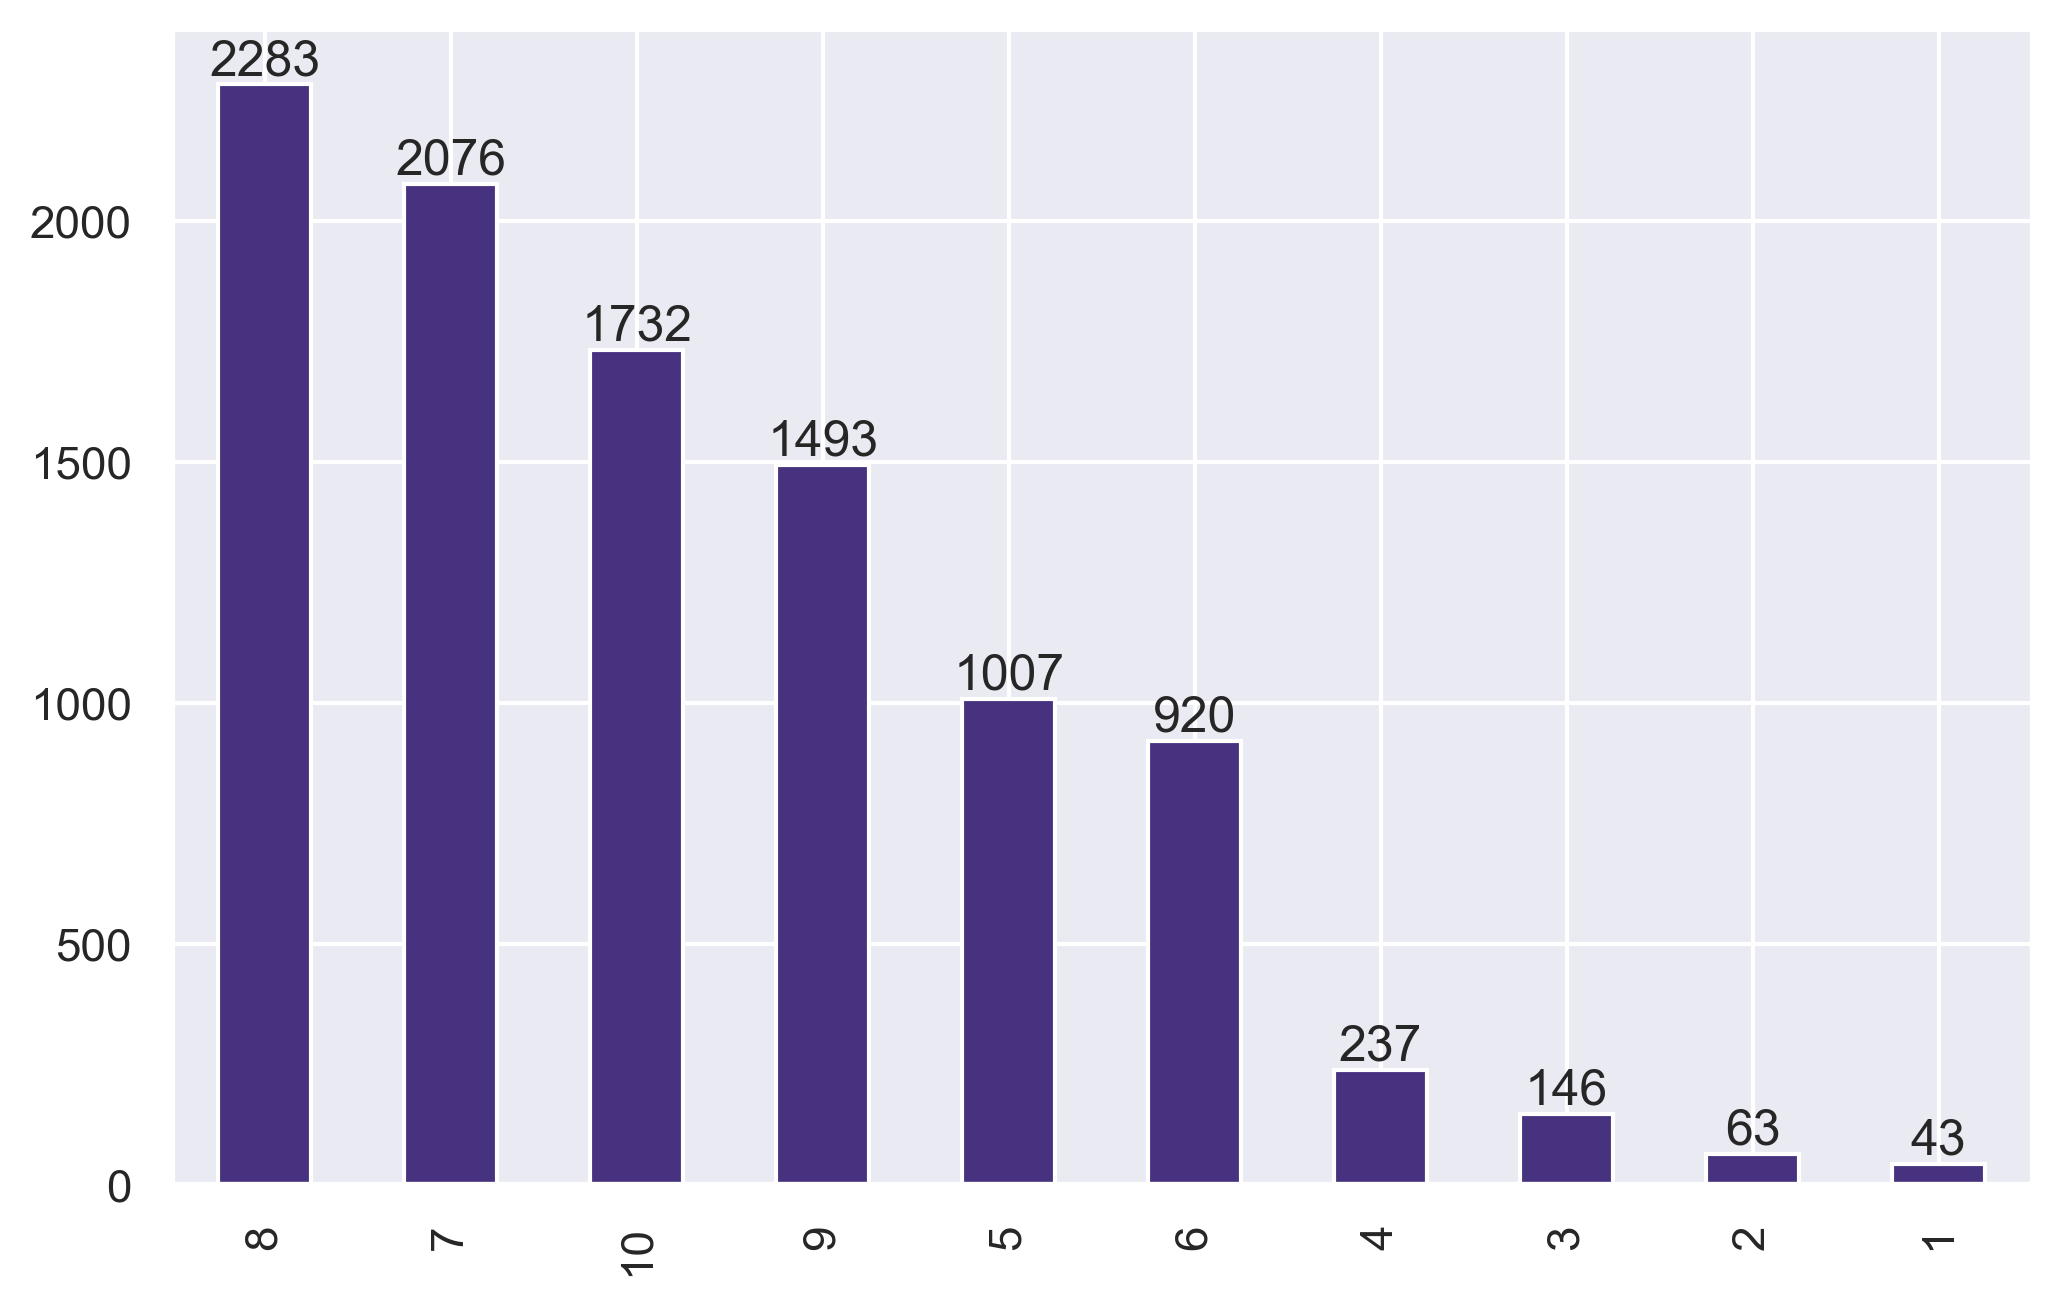

In [13]:
barplot = df['Book_Rating'].value_counts().plot(kind = 'bar')

for i in barplot.containers:
    barplot.bar_label(i)

In [14]:
#Model Building
df.head()

,Userid,Book_Title,Book_Rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6


In [18]:
cleaned_df = df.drop_duplicates(subset=['Userid', 'Book_Title'])
pivot = cleaned_df.pivot(index='Userid', columns='Book_Title', values='Book_Rating')

In [19]:
pivot

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
Userid,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [20]:
pivot.fillna(0,inplace=True)

In [21]:
pivot

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
Userid,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [22]:
#Calculate the distances and similarity

In [23]:
from sklearn.metrics import pairwise_distances

In [24]:
pd.DataFrame(pairwise_distances(pivot,metric='cosine'))

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,2.220446e-16,1.0,1.0,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.000000e+00,0.0,1.0,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.000000e+00,1.0,0.0,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.000000e+00,1.0,1.0,0.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.000000e+00,1.0,1.0,1.0,1.110223e-16,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,1.000000e+00,1.0,1.0,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2178,1.000000e+00,1.0,1.0,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2179,1.000000e+00,1.0,1.0,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
2180,1.000000e+00,1.0,1.0,1.0,1.000000e+00,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [25]:
df.head(3)

,Userid,Book_Title,Book_Rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6


In [27]:
sim = 1 - pairwise_distances(pivot, metric='cosine')
pd.DataFrame(sim)

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
np.fill_diagonal(sim,0)

In [29]:
similarity = pd.DataFrame(sim)
similarity

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
similarity.index = df['Userid'].unique()
similarity.columns = df['Userid'].unique()

In [31]:
pd.set_option('display.max_columns',None)

In [32]:
similarity

276726  276729  276736  276737  276744  276745  276747  276748  \
276726     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276729     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276736     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276737     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276744     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
162107     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162109     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162113     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162121     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162129     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

        276751  276754  276755  276760  276762  276768  276772  276774  \
276726     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276729     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276736     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276737     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276744     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
162107     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162109     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162113     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162121     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162129     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

        276780  276786  276788  276796  276798  276800  276804  276808  \
276726     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276729     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276736     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276737     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276744     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
162107     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162109     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162113     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162121     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162129     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

        276811  276812  276813  276814  276820  276822  276827  276828  \
276726     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276729     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276736     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276737     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276744     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
162107     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162109     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162113     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162121     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
162129     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

        276830  276832  276835  276837  276842  276847  276848  276850  \
276726     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276729     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276736     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276737     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
276744     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...     

In [33]:
#Find out similar users

In [35]:
pd.DataFrame(similarity.idxmax())

,0
276726,276726
276729,276726
276736,276726
276737,276726
276744,276726
...,...
162107,276726
162109,276726
162113,161453
162121,276726


In [38]:
df[(df['Userid'] == 276729) | (df['Userid'] == 276726)]

,Userid,Book_Title,Book_Rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6


In [39]:
df[(df['Userid'] == 162107) | (df['Userid'] == 276726)]

,Userid,Book_Title,Book_Rating
1,276726,Classical Mythology,5
9988,162107,What's Bred in the Bone,7


In [40]:
df[(df['Userid'] == 162113) | (df['Userid'] == 161453)]

,Userid,Book_Title,Book_Rating
8960,161453,"Bread, Tomato, Garlic: Quick Cooking With 3 Ma...",9
8961,161453,"The Ubiquitous Shrimp: From Simple to Exotic, ...",8
9990,162113,The Cape Ann (Contemporary American Fiction),8


In [41]:
df[(df['Userid'] == 276744) | (df['Userid'] == 276726)]

,Userid,Book_Title,Book_Rating
1,276726,Classical Mythology,5
6,276744,The Kitchen God's Wife,7
